#<h1><center><font color='CornflowerBlue'>***Project AI & Cognition***</font></center></h1>

**Realized by :**
 *           Salma BELHADJ ALI
 *           Islem SAOUDI
 *           Arij MAZIGH
 *           Farah BEN HASSINE
 *           Yacine BENMOUSSA
 




# <font color='Coral'>**Part 1 : Data Extraction**</font>

**1- Import all libraries**

In [ ]:
!pip3 install spacy
!pip install rdflib
!pip install PyPDF2
!pip install owlready2
!pip install pdfplumber
!python -m spacy download en_core_web_lg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-10-18 10:09:24.764439: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.7 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import re
import os
import io
import nltk
import spacy
import string
import gensim
import rdflib
import PyPDF2
import pdfplumber
import numpy as np
import pandas as pd
import en_core_web_sm
import seaborn as sns
from owlready2 import *
from spacy import displacy
from rdflib	import Namespace
from spacy.tokens import Span
from collections import Counter
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**2- Read the document**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#List the drive's content to fix the path
! ls /content/gdrive/MyDrive/projetIA

extract  pdf.pdf  PMBOK6-2017.pdf  PMBOK6-201.pdf  pmbok.pdf


In [ ]:
open_filename =open("/content/gdrive/MyDrive/projetIA/pmbok.pdf","rb")
ind_manifesto = PyPDF2.PdfFileReader(open_filename)
pdf = pdfplumber.open(open_filename)

**3- Check the document information**

In [ ]:
ind_manifesto.getDocumentInfo()

{'/CreationDate': "D:20170828082604-04'00'",
 '/Creator': 'Adobe InDesign CS6 (Macintosh)',
 '/ModDate': "D:20170907131536+03'00'",
 '/PDFVersion': '1.6',
 '/Producer': '3-Heights(TM) PDF Security Shell 4.8.25.2 (http://www.pdf-tools.com)',
 '/Trapped': '/False'}

**4- Check number of pages**

In [ ]:
total_pages = ind_manifesto.numPages
total_pages

976

**5- Extract Process**

In [ ]:
def ChapterExtraction():
  
    c=''
    name=''
    dfChapter = pd.DataFrame(columns=['Title', 'Corpus']) 

    for i in range (166,170) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCOPE MANAGEMENT"
    dfChapter = dfChapter.append({'Title': name,'Corpus': c}, ignore_index = True)

    c=''
    for i in range (210,215) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCHEDULE MANAGEMENT"
    dfChapter = dfChapter.append({'Title': name,'Corpus': c}, ignore_index = True)

    c=''
    for i in range (268,271) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT COST MANAGEMENT"
    dfChapter = dfChapter.append({'Title': name,'Corpus': c}, ignore_index = True)

    return (dfChapter)

In [ ]:
dfChapter = ChapterExtraction()
dfChapter

,Title,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...


In [ ]:
ch = ''
for i in range (170,307) : 
		ch = ch + pdf.pages[i].extract_text()

inputs = re.compile(r'\d+\..+: INPUTS\n')
tools_and_techniques = re.compile(r'\d+\..+: TOOLS AND TECHNIQUES\n')
outputs = re.compile(r'\d+\..+: OUTPUTS\n')

inputsList = inputs.findall(ch)
toolsList = tools_and_techniques.findall(ch)
outputsList = outputs.findall(ch)

In [ ]:
print(len(inputsList))
print(len(toolsList))
print(len(outputsList))

16
16
16


In [ ]:
print(inputsList)
print(toolsList)
print(outputsList)

['5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n', '5.2.1 COLLECT REQUIREMENTS: INPUTS\n', '1515.3.1 DEFINE SCOPE: INPUTS\n', '5.4.1 CREATE WBS: INPUTS\n', '5.5.1 VALIDATE SCOPE: INPUTS\n', '5.6.1 CONTROL SCOPE: INPUTS\n', '1796.1.1 PLAN SCHEDULE MANAGEMENT: INPUTS\n', '1836.2.1 DEFINE ACTIVITIES: INPUTS\n', '6.3.1 SEQUENCE ACTIVITIES: INPUTS\n', '1976.4.1 ESTIMATE ACTIVITY DURATIONS: INPUTS\n', '6.5.1 DEVELOP SCHEDULE: INPUTS\n', '6.6.1 CONTROL SCHEDULE: INPUTS\n', '7.1.1 PLAN COST MANAGEMENT: INPUTS\n', '7.2.1 ESTIMATE COSTS: INPUTS\n', '2497.3.1 DETERMINE BUDGET: INPUTS\n', '7.4.1 CONTROL COSTS: INPUTS\n']
['5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQUES\n', '1415.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHNIQUES\n', '5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n', '1575.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n', '1655.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n', '5.6.2 CONTROL SCOPE: TOOLS AND TECHNIQUES\n', '6.1.2 PLAN SCHEDULE MANAGEMENT: TOOLS AND TECHNIQUES\n', '6.2.2 DEFINE ACTIVITIES: TOOL

In [ ]:
def processExtraction():

    c=''
    name=''
    start = 0
    j = -1
    df_process = pd.DataFrame(columns=['Title', 'Corpus']) 

    for i in range (170,306) :
          page = (pdf.pages[i]).extract_text()
          #text = page.extract_text()
          for line in page.split('\n') :
              if re.match('\d{1}.\d\s[A-Z]+\s[A-Z]+',line) : 
                  j = j + 1 
                  if start != 0 :
                      df_process = df_process.append({'Title': name, 'Corpus':c[:-6]}, ignore_index = True)

                  s = line[4:]
                  e = inputsList[j]
                  c = (ch.split(s))[1].split(e)[0]
                  start = i
                  name = line[4:]
 
    df_process = df_process.append({'Title' : name, 'Corpus':c[:-6]}, ignore_index = True)
    
    return (df_process)

In [ ]:
dfProcess = processExtraction()
dfProcess

,Title,Corpus
0,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


In [ ]:
df = dfChapter.append(dfProcess, ignore_index=True)
df

,Title,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
5,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
6,CREATE WBS,\nCreate WBS is the process of subdividing pro...
7,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
8,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
9,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...


**6- Extract Inputs** 

In [ ]:
c = ''
dfInputs = pd.DataFrame(columns=['Title','Corpus'])
dfInputsTitres = pd.DataFrame(columns=['Title', 'Corpus'])
for i in range(0,16):
    start = inputsList[i]
    #print(start)
    end = toolsList[i]
    #print(end)
    c = (ch.split(start))[1].split(end)[0]

    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n')
    inputsL = Title.findall(c)
    for j in range(0,len(inputsL)-1):
        st = inputsL[j]
        e = inputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        dfInputsTitres = dfInputsTitres.append({'Title': st, 'Corpus': co} ,ignore_index = True)

    dfInputs = dfInputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfInputs

,Title,Corpus
0,5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n,5.1.1.1 PROJECT CHARTER\nDescribed in Section ...
1,5.2.1 COLLECT REQUIREMENTS: INPUTS\n,5.2.1.1 PROJECT CHARTER\nDescribed in Section ...
2,1515.3.1 DEFINE SCOPE: INPUTS\n,5.3.1.1 PROJECT CHARTER\nDescribed in Section ...
3,5.4.1 CREATE WBS: INPUTS\n,5.4.1.1 PROJECT MANAGEMENT PLAN\nA project man...
4,5.5.1 VALIDATE SCOPE: INPUTS\n,5.5.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...
5,5.6.1 CONTROL SCOPE: INPUTS\n,5.6.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...
6,1796.1.1 PLAN SCHEDULE MANAGEMENT: INPUTS\n,6.1.1.1 PROJECT CHARTER\nDescribed in Section ...
7,1836.2.1 DEFINE ACTIVITIES: INPUTS\n,6.2.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...
8,6.3.1 SEQUENCE ACTIVITIES: INPUTS\n,6.3.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...
9,1976.4.1 ESTIMATE ACTIVITY DURATIONS: INPUTS\n,6.4.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...


In [ ]:
dfInputsTitres

,Title,Corpus
0,5.1.1.1 PROJECT CHARTER\n,Described in Section 4.1.3.1. The project char...
1,5.1.1.2 PROJECT MANAGEMENT PLAN\n,Described in Section 4.2.3.1. Project manageme...
2,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,The enterprise environmental factors that can ...
3,5.2.1.1 PROJECT CHARTER\n,Described in Section 4.1.3.1. The project char...
4,5.2.1.2 PROJECT MANAGEMENT PLAN\n,Described in Section 4.2.3.1. Project manageme...
5,5.2.1.3 PROJECT DOCUMENTS\n,Examples of project documents that can be cons...
6,5.2.1.4 BUSINESS DOCUMENTS\n,Described in Section 1.2.6. A business documen...
7,5.2.1.6 ENTERPRISE ENVIRONMENTAL FACTORS\n,The enterprise environmental factors that can ...
8,5.3.1.1 PROJECT CHARTER\n,Described in Section 4.1.3.1. The project char...
9,5.3.1.2 PROJECT MANAGEMENT PLAN\n,Described in Section 4.2.3.1. A project manage...


In [ ]:
df1 = dfInputs.append(dfInputsTitres, ignore_index=True)
df1

,Title,Corpus
0,5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n,5.1.1.1 PROJECT CHARTER\nDescribed in Section ...
1,5.2.1 COLLECT REQUIREMENTS: INPUTS\n,5.2.1.1 PROJECT CHARTER\nDescribed in Section ...
2,1515.3.1 DEFINE SCOPE: INPUTS\n,5.3.1.1 PROJECT CHARTER\nDescribed in Section ...
3,5.4.1 CREATE WBS: INPUTS\n,5.4.1.1 PROJECT MANAGEMENT PLAN\nA project man...
4,5.5.1 VALIDATE SCOPE: INPUTS\n,5.5.1.1 PROJECT MANAGEMENT PLAN\nDescribed in ...
...,...,...
62,7.3.1.3 BUSINESS DOCUMENTS\n,Described in Section 1.2.6. The business docum...
63,7.3.1.5 ENTERPRISE ENVIRONMENTAL FACTORS\n,The enterprise environmental factors that can ...
64,7.4.1.1 PROJECT MANAGEMENT PLAN\n,Described in Section 4.2.3.1. Project manageme...
65,7.4.1.3 PROJECT FUNDING REQUIREMENTS\n,Described in Section 7.3.3.2. The project fund...


In [ ]:
df2 = df.append(df1, ignore_index=True)
df2

,Title,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
...,...,...
81,7.3.1.3 BUSINESS DOCUMENTS\n,Described in Section 1.2.6. The business docum...
82,7.3.1.5 ENTERPRISE ENVIRONMENTAL FACTORS\n,The enterprise environmental factors that can ...
83,7.4.1.1 PROJECT MANAGEMENT PLAN\n,Described in Section 4.2.3.1. Project manageme...
84,7.4.1.3 PROJECT FUNDING REQUIREMENTS\n,Described in Section 7.3.3.2. The project fund...


**7- Extract Tools**

In [ ]:
c = ''
dfTools = pd.DataFrame(columns=['Title','Corpus'])
dfToolsTitres = pd.DataFrame(columns=['Title', 'Corpus'])

for i in range(0,16):
    start = toolsList[i]
    end = outputsList[i]
    c = (ch.split(start))[1].split(end)[0]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n')
    toolsL = Title.findall(c)

    for j in range(0,len(toolsL)-1):
        st = toolsL[j]
        e = toolsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        dfToolsTitres = dfToolsTitres.append({'Title': st, 'Corpus': co} ,ignore_index = True)

    dfTools = dfTools.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfTools

,Title,Corpus
0,5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQ...,5.1.2.1 EXPERT JUDGMENT\nDescribed in Section ...
1,1415.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHN...,5.2.2.1 EXPERT JUDGMENT\nDescribed in Section ...
2,5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n,5.3.2.1 EXPERT JUDGMENT\nDescribed in Section ...
3,1575.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n,5.4.2.1 EXPERT JUDGMENT\nDescribed in Section ...
4,1655.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n,5.5.2.1 INSPECTION\nDescribed in Section 8.3.2...
5,5.6.2 CONTROL SCOPE: TOOLS AND TECHNIQUES\n,5.6.2.1 DATA ANALYSIS\nData analysis technique...
6,6.1.2 PLAN SCHEDULE MANAGEMENT: TOOLS AND TECH...,6.1.2.1 EXPERT JUDGMENT\nDescribed in Section ...
7,6.2.2 DEFINE ACTIVITIES: TOOLS AND TECHNIQUES\n,6.2.2.1 EXPERT JUDGMENT\nDescribed in Section ...
8,6.3.2 SEQUENCE ACTIVITIES: TOOLS AND TECHNIQUES\n,6.3.2.1 PRECEDENCE DIAGRAMMING METHOD\nThe pre...
9,1996.4.2 ESTIMATE ACTIVITY DURATIONS: TOOLS AN...,6.4.2.1 EXPERT JUDGMENT\nDescribed in Section ...


In [ ]:
dfToolsTitres

,Title,Corpus
0,5.1.2.1 EXPERT JUDGMENT\n,Described in Section 4.1.2.1 Expertise should ...
1,5.2.2.1 EXPERT JUDGMENT\n,Described in Section 4.1.2.1. Expertise should...
2,5.2.2.2 DATA GATHERING\n,Data-gathering techniques that can be used for...
3,5.2.2.3 DATA ANALYSIS\n,Described in Section 4.5.2.2. Data analysis te...
4,5.2.2.4 DECISION MAKING\n,Decision-making techniques that can be used in...
5,5.2.2.5 DATA REPRESENTATION\n,Data representation techniques that can be use...
6,5.2.2.6 INTERPERSONAL AND TEAM SKILLS\n,Described in Section 4.1.2.3. The interpersona...
7,5.3.2.1 EXPERT JUDGMENT\n,Described in Section 4.1.2.1. Expertise should...
8,5.3.2.2 DATA ANALYSIS\n,An example of a data analysis technique that c...
9,5.3.2.3 DECISION MAKING\n,Described in Section 5.1.2.2. A decision-makin...


In [ ]:
df3 = dfTools.append(dfToolsTitres, ignore_index=True)
df3

,Title,Corpus
0,5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQ...,5.1.2.1 EXPERT JUDGMENT\nDescribed in Section ...
1,1415.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHN...,5.2.2.1 EXPERT JUDGMENT\nDescribed in Section ...
2,5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n,5.3.2.1 EXPERT JUDGMENT\nDescribed in Section ...
3,1575.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n,5.4.2.1 EXPERT JUDGMENT\nDescribed in Section ...
4,1655.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n,5.5.2.1 INSPECTION\nDescribed in Section 8.3.2...
...,...,...
59,7.3.2.2 COST AGGREGATION\n,Cost estimates are aggregated by work packages...
60,7.3.2.3 DATA ANALYSIS\n,A data analysis technique that can be used in ...
61,7.3.2.4 HISTORICAL INFORMATION REVIEW\n,Reviewing historical information can assist in...
62,7.4.2.1 EXPERT JUDGMENT\n,Described in Section 4.1.2.1. Examples of expe...


In [ ]:
df4 = df2.append(df3, ignore_index=True)
df4

,Title,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
...,...,...
145,7.3.2.2 COST AGGREGATION\n,Cost estimates are aggregated by work packages...
146,7.3.2.3 DATA ANALYSIS\n,A data analysis technique that can be used in ...
147,7.3.2.4 HISTORICAL INFORMATION REVIEW\n,Reviewing historical information can assist in...
148,7.4.2.1 EXPERT JUDGMENT\n,Described in Section 4.1.2.1. Examples of expe...


**8- Extract Outputs**

In [ ]:
c = ''
dfOutputs = pd.DataFrame(columns=['Title','Corpus'])

for i in range(0,15):
    start = outputsList[i]
    end = dfProcess['Title'][i+1]
    c = (ch.split(start))[1].split(end)[0]
    dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

start = outputsList[15]
end = ch.split()[-1]
c = (ch.split(start))[1].split(end)[0]

dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfOutputs

,Title,Corpus
0,5.1.3 PLAN SCOPE MANAGEMENT: OUTPUTS\n,5.1.3.1 SCOPE MANAGEMENT PLAN\nThe scope manag...
1,5.2.3 COLLECT REQUIREMENTS: OUTPUTS\n,5.2.3.1 REQUIREMENTS DOCUMENTATION\nRequiremen...
2,1535.3.3 DEFINE SCOPE: OUTPUTS\n,5.3.3.1 PROJECT SCOPE STATEMENT\nThe project s...
3,5.4.3 CREATE WBS: OUTPUTS\n,5.4.3.1 SCOPE BASELINE\nThe scope baseline is ...
4,5.5.3 VALIDATE SCOPE: OUTPUTS\n,5.5.3.1 ACCEPTED DELIVERABLES\nDeliverables th...
5,5.6.3 CONTROL SCOPE: OUTPUTS\n,5.6.3.1 WORK PERFORMANCE INFORMATION\nWork per...
6,6.1.3 PLAN SCHEDULE MANAGEMENT: OUTPUTS\n,�\n� 6.1.3.1 SCHEDULE MANAGEMENT PLAN\nThe sch...
7,6.2.3 DEFINE ACTIVITIES: OUTPUTS\n,6.2.3.1 ACTIVITY LIST\nThe activity list inclu...
8,1936.3.3 SEQUENCE ACTIVITIES: OUTPUTS\n,6.3.3.1 PROJECT SCHEDULE NETWORK DIAGRAMS\nA p...
9,6.4.3 ESTIMATE ACTIVITY DURATIONS: OUTPUTS\n,6.4.3.1 DURATION ESTIMATES\nDuration estimates...


In [ ]:
dfOutputsTitres = pd.DataFrame(columns=['Title', 'Corpus'])

for i in range(0,len(dfOutputs)):
    c = dfOutputs['Corpus'][i]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n')
    outputsL = Title.findall(c)

    for j in range(0,len(outputsL)-1):
        st = outputsL[j]
        e = outputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        dfOutputsTitres = dfOutputsTitres.append({'Title': st, 'Corpus': co} ,ignore_index = True)

st = outputsL[4]
e = ch.split()[-1]
co = (c.split(st))[1].split(e)[0]

dfOutputsTitres = dfOutputsTitres.append({'Title': st, 'Corpus': co} ,ignore_index = True)

In [ ]:
dfOutputsTitres

,Title,Corpus
0,5.1.3.1 SCOPE MANAGEMENT PLAN\n,The scope management plan is a component of th...
1,5.2.3.1 REQUIREMENTS DOCUMENTATION\n,Requirements documentation describes how indiv...
2,5.2.3.2 REQUIREMENTS TRACEABILITY MATRIX\n,The requirements traceability matrix is a grid...
3,5.3.3.1 PROJECT SCOPE STATEMENT\n,The project scope statement is the description...
4,5.4.3.1 SCOPE BASELINE\n,The scope baseline is the approved version of ...
5,5.5.3.1 ACCEPTED DELIVERABLES\n,Deliverables that meet the acceptance criteria...
6,5.5.3.2 WORK PERFORMANCE INFORMATION\n,Work performance information includes informat...
7,5.5.3.3 CHANGE REQUESTS\n,The completed deliverables that have not been ...
8,5.6.3.1 WORK PERFORMANCE INFORMATION\n,Work performance information produced includes...
9,5.6.3.2 CHANGE REQUESTS\n,Described in Section 4.3.3.4. Analysis of proj...


In [ ]:
df5 = dfOutputs.append(dfOutputsTitres,ignore_index=True)

In [ ]:
dfFinale = df4.append(df5, ignore_index=True)
dfFinale

,Title,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
...,...,...
198,7.4.3.1 WORK PERFORMANCE INFORMATION\n,Described in Section 4.5.1.3. Work performance...
199,7.4.3.2 COST FORECASTS\n,Either a calculated EAC value or a bottom-up E...
200,7.4.3.3 CHANGE REQUESTS\n,Described in Section 4.3.3.4. Analysis of proj...
201,7.4.3.4 PROJECT MANAGEMENT PLAN UPDATES\n,Any change to the project management plan goes...


# <font color='Coral'>**Part 2 : Data Processing**</font>

In [ ]:
print(dfFinale.shape)

(203, 2)


In [ ]:
print(dfFinale.duplicated().value_counts())

False    203
dtype: int64


In [ ]:
print(dfFinale.isnull().sum())

Title     0
Corpus    0
dtype: int64


**1- LowerCase**

In [ ]:
def lowercase(text):
    return text.lower()

In [ ]:
# Data transformation into lowercase letters
dfFinale['Title'] =dfFinale['Title'].apply(lambda x : lowercase(x))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : lowercase(x))

In [ ]:
dfFinale['Title'][0]

'project scope management'

**2- Replace unknown Data**

In [ ]:
#Remove /n
def remove_return(text):
    return re.sub("\n"," ",text)

In [ ]:
dfFinale['Title'] = dfFinale['Title'].apply(lambda x : remove_return(x))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_return(x))

In [ ]:
dfFinale['Corpus'][0]

'project scope management overview 5.1 plan scope 5.2 collect  5.3 define scope management requirements .1 inputs .1 inputs .1 inputs   .1 project charter   .1 project charter   .1 project charter   .2 project management plan   .2 project management plan   .2 project management plan   .3 enterprise environmental     .3 project documents   .3 project documents      factors   .4 business documents   .4 enterprise environmental     .4 organizational process assets   .5 agreements     factors    .6 enterprise environmental     .5 organizational process assets  .2 tools & techniques     factors    .1 expert judgment .2 tools & techniques   .7 organizational process assets     .2 data analysis   .1 expert judgment   .3 meetings  .2 tools & techniques    .2 data analysis   .1 expert judgment   .3 decision making .3 outputs   .2 data gathering   .4 interpersonal and team skills   .1 scope management plan   .3 data analysis   .5 product analysis   .2 requirements management     .4 decision maki

**2- Remove punctuations**

In [ ]:
def remove_punctuations(text):
    return re.sub(r'[^\w\s\.]', '', text)

In [ ]:
dfFinale['Title'] = dfFinale['Title'].apply(lambda x : remove_punctuations(x))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_punctuations(x))

In [ ]:
dfFinale['Corpus'][0]

'project scope management overview 5.1 plan scope 5.2 collect  5.3 define scope management requirements .1 inputs .1 inputs .1 inputs   .1 project charter   .1 project charter   .1 project charter   .2 project management plan   .2 project management plan   .2 project management plan   .3 enterprise environmental     .3 project documents   .3 project documents      factors   .4 business documents   .4 enterprise environmental     .4 organizational process assets   .5 agreements     factors    .6 enterprise environmental     .5 organizational process assets  .2 tools  techniques     factors    .1 expert judgment .2 tools  techniques   .7 organizational process assets     .2 data analysis   .1 expert judgment   .3 meetings  .2 tools  techniques    .2 data analysis   .1 expert judgment   .3 decision making .3 outputs   .2 data gathering   .4 interpersonal and team skills   .1 scope management plan   .3 data analysis   .5 product analysis   .2 requirements management     .4 decision making 

In [ ]:
#Remove whitespaces
def remove_whitespaces(text):
    return text.strip()

In [ ]:
dfFinale['Title'] = dfFinale['Title'].apply(lambda x : remove_whitespaces(x))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : remove_whitespaces(x))

In [ ]:
dfFinale['Corpus'][0]

'project scope management overview 5.1 plan scope 5.2 collect  5.3 define scope management requirements .1 inputs .1 inputs .1 inputs   .1 project charter   .1 project charter   .1 project charter   .2 project management plan   .2 project management plan   .2 project management plan   .3 enterprise environmental     .3 project documents   .3 project documents      factors   .4 business documents   .4 enterprise environmental     .4 organizational process assets   .5 agreements     factors    .6 enterprise environmental     .5 organizational process assets  .2 tools  techniques     factors    .1 expert judgment .2 tools  techniques   .7 organizational process assets     .2 data analysis   .1 expert judgment   .3 meetings  .2 tools  techniques    .2 data analysis   .1 expert judgment   .3 decision making .3 outputs   .2 data gathering   .4 interpersonal and team skills   .1 scope management plan   .3 data analysis   .5 product analysis   .2 requirements management     .4 decision making 

In [ ]:
def unique_list(text_str):
    l = text_str.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)

In [ ]:
dfFinale['Title'] = dfFinale['Title'].apply(lambda x : unique_list(x))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x : unique_list(x))

In [ ]:
dfFinale['Corpus'][0]

'project scope management overview 5.1 plan 5.2 collect 5.3 define requirements .1 inputs charter .2 .3 enterprise environmental documents factors .4 business organizational process assets .5 agreements .6 tools techniques expert judgment .7 data analysis meetings decision making outputs gathering interpersonal and team skills product representation statement updates context diagram .8 prototypes 5.4 create wbs 5.6 control documentation traceability matrix 5.5 validate work performance decomposition baseline verified deliverables information change requests inspection accepted figure 51. part 1 guide 130 key concepts for in the term can refer to uuproduct scope. features functions that characterize a service or result. uuproject performed deliver result with speciﬁed functions. is sometimes viewed as including life cycles range along continuum from predictive approaches at one end adaptive agile other. cycle are deﬁned beginning of any changes progressively managed. an developed over m

In [ ]:
dfFinale = dfFinale.astype(str)
dfFinale

,Title,Corpus
0,project scope management,project scope management overview 5.1 plan 5.2...
1,project schedule management,project schedule management overview 6.1 plan ...
2,project cost management,project cost management overview 7.1 plan 7.2 ...
3,plan scope management,plan scope management is the process of creati...
4,collect requirements,collect requirements is the process of determi...
...,...,...
198,7.4.3.1 work performance information,described in section 4.5.1.3. work performance...
199,7.4.3.2 cost forecasts,either a calculated eac value or bottomup is d...
200,7.4.3.3 change requests,described in section 4.3.3.4. analysis of proj...
201,7.4.3.4 project management plan updates,any change to the project management plan goes...


In [ ]:
# NLTK Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
unimportant_words = ["you're", "you've", "she's", "it's","is", 'who', 'whom', 'am','are', 'was', 'were', 'be','been','being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                "a",'other', 'some',  'no', 'nor', 'not', 'own', 'same',  's', 't', 'can', 'don', "don't", 'should',"should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't", 'will','such','as', 'weren', "weren't",
                'won', "won't", 'wouldn', "wouldn't",'can','PMBOK® Guide','agile','environmental','A Practice Guide','the','a','this','and']
stop_words = stop_words + unimportant_words

In [ ]:
dfFinale['Title'] = dfFinale['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
dfFinale['Corpus']=dfFinale['Corpus'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dfFinale['Corpus'][4]

'collect requirements process determining documenting managing stakeholder needs meet objectives. key beneﬁt provides basis deﬁning product scope project scope. performed predeﬁned points project. inputs tools techniques outputs depicted figure 54. 55 depicts data ﬂow diagram process. .1 charter expert judgment documentation .2 management plan gathering traceability brainstorming matrix interviews focus groups engagement questionnaires surveys .3 documents benchmarking assumption log analysis lessons learned register document .4 decision making business voting case multicriteria .5 agreements .6 enterprise representation factors affinity diagrams .7 organizational assets mind mapping interpersonal team skills nominal group technique observationconversation facilitation context .8 prototypes part 1 guide 138 4.1 develop 5.2 requirem eprnotjesct 12.2 conduct procurements organization 55. flow 139the pmbok speciﬁcally address since industry speciﬁc. note practitioners practice 7 indepth i

In [ ]:
#Perform tokenization in combination with regular expressions
regexp = RegexpTokenizer('\w+')
dfFinale['Title'] = dfFinale['Title'].apply(regexp.tokenize)
dfFinale['Corpus']=dfFinale['Corpus'].apply(regexp.tokenize)

In [ ]:
dfFinale['Corpus'][0]

['project',
 'scope',
 'management',
 'overview',
 '5',
 '1',
 'plan',
 '5',
 '2',
 'collect',
 '5',
 '3',
 'define',
 'requirements',
 '1',
 'inputs',
 'charter',
 '2',
 '3',
 'enterprise',
 'documents',
 'factors',
 '4',
 'business',
 'organizational',
 'process',
 'assets',
 '5',
 'agreements',
 '6',
 'tools',
 'techniques',
 'expert',
 'judgment',
 '7',
 'data',
 'analysis',
 'meetings',
 'decision',
 'making',
 'outputs',
 'gathering',
 'interpersonal',
 'team',
 'skills',
 'product',
 'representation',
 'statement',
 'updates',
 'context',
 'diagram',
 '8',
 'prototypes',
 '5',
 '4',
 'create',
 'wbs',
 '5',
 '6',
 'control',
 'documentation',
 'traceability',
 'matrix',
 '5',
 '5',
 'validate',
 'work',
 'performance',
 'decomposition',
 'baseline',
 'verified',
 'deliverables',
 'information',
 'change',
 'requests',
 'inspection',
 'accepted',
 'figure',
 '51',
 'part',
 '1',
 'guide',
 '130',
 'key',
 'concepts',
 'term',
 'refer',
 'uuproduct',
 'scope',
 'features',
 'funct

In [ ]:
# Create a reference variable for Class MWETokenizer

tk = MWETokenizer([('project', 'scope', 'management'),('define', 'activities'),('sequence', 'activities'),('plan', 'scope', 'management'),('project', 'schedule', 'management'),('collect', 'requirements'),( 'control', 'scope'),('estimate', 'activity', 'durations'),
                   ('plan', 'cost', 'management'),('project', 'cost', 'management'),('create', 'wbs'),('develop', 'schedule'),('plan', 'schedule', 'management'),('define', 'scope'),('validate', 'scope'),('control', 'schedule')])

for i in range(len(dfFinale)):
  text= dfFinale['Title'][i]
  tokenized = tk.tokenize(text)
  print(tokenized)

for i in range(len(dfFinale)):
  text= dfFinale['Corpus'][i]
  tokenized = tk.tokenize(text)
  print(tokenized)

['project_scope_management']
['project_schedule_management']
['project_cost_management']
['plan_scope_management']
['collect_requirements']
['define_scope']
['create_wbs']
['validate_scope']
['control_scope']
['plan_schedule_management']
['define_activities']
['sequence_activities']
['estimate_activity_durations']
['develop_schedule']
['control_schedule']
['plan_cost_management']
['estimate', 'costs']
['determine', 'budget']
['control', 'costs']
['5', '1', '1', 'plan_scope_management', 'inputs']
['5', '2', '1', 'collect_requirements', 'inputs']
['1515', '3', '1', 'define_scope', 'inputs']
['5', '4', '1', 'create_wbs', 'inputs']
['5', '5', '1', 'validate_scope', 'inputs']
['5', '6', '1', 'control_scope', 'inputs']
['1796', '1', '1', 'plan_schedule_management', 'inputs']
['1836', '2', '1', 'define_activities', 'inputs']
['6', '3', '1', 'sequence_activities', 'inputs']
['1976', '4', '1', 'estimate_activity_durations', 'inputs']
['6', '5', '1', 'develop_schedule', 'inputs']
['6', '6', '1',

**5- Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

for words in dfFinale['Title'].astype(str):
    print(words + " ---> " + lemmatizer.lemmatize(words))

['project', 'scope', 'management'] ---> ['project', 'scope', 'management']
['project', 'schedule', 'management'] ---> ['project', 'schedule', 'management']
['project', 'cost', 'management'] ---> ['project', 'cost', 'management']
['plan', 'scope', 'management'] ---> ['plan', 'scope', 'management']
['collect', 'requirements'] ---> ['collect', 'requirements']
['define', 'scope'] ---> ['define', 'scope']
['create', 'wbs'] ---> ['create', 'wbs']
['validate', 'scope'] ---> ['validate', 'scope']
['control', 'scope'] ---> ['control', 'scope']
['plan', 'schedule', 'management'] ---> ['plan', 'schedule', 'management']
['define', 'activities'] ---> ['define', 'activities']
['sequence', 'activities'] ---> ['sequence', 'activities']
['estimate', 'activity', 'durations'] ---> ['estimate', 'activity', 'durations']
['develop', 'schedule'] ---> ['develop', 'schedule']
['control', 'schedule'] ---> ['control', 'schedule']
['plan', 'cost', 'management'] ---> ['plan', 'cost', 'management']
['estimate', 'co

**6- POS Tagging**

In [ ]:
nlp = en_core_web_sm.load()
dfFinale['Pos_Tag']=dfFinale['Title'].apply(nltk.pos_tag)

In [ ]:
dfFinale

,Title,Corpus,Pos_Tag
0,"[projet, scope, management]","[project, scope, management, overview, 5, 1, p...","[(projet, NN), (scope, NN), (management, NN)]"
1,"[projet, schedule, management]","[project, schedule, management, overview, 6, 1...","[(projet, NN), (schedule, NN), (management, NN)]"
2,"[projet, cost, management]","[project, cost, management, overview, 7, 1, pl...","[(projet, NN), (cost, NN), (management, NN)]"
3,"[plan, scope, management]","[plan, scope, management, process, creating, d...","[(plan, NN), (scope, VBP), (management, NN)]"
4,"[collect, requirements]","[collect, requirements, process, determining, ...","[(collect, NN), (requirements, NNS)]"
...,...,...,...
198,"[7, 4, 3, 1, work, performance, information]","[described, section, 4, 5, 1, 3, work, perform...","[(7, CD), (4, CD), (3, CD), (1, CD), (work, NN..."
199,"[7, 4, 3, 2, cost, forecasts]","[either, calculated, eac, value, bottomup, doc...","[(7, CD), (4, CD), (3, CD), (2, CD), (cost, NN..."
200,"[7, 4, 3, 3, change, requests]","[described, section, 4, 3, 3, 4, analysis, pro...","[(7, CD), (4, CD), (3, CD), (3, CD), (change, ..."
201,"[7, 4, 3, 4, project, management, plan, updates]","[change, project, management, plan, goes, orga...","[(7, CD), (4, CD), (3, CD), (4, CD), (project,..."


In [ ]:
def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [ ]:
#Create a list of all words
all_words = ''.join([str(word) for word in dfFinale['Corpus'].apply(lambda x : remove_irr_char_func(str(x)))])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
#Create a frequency distribution which records the number of times each word has occurred :
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'project': 249, 'process': 158, 'section': 139, 'plan': 133, 'include': 132, 'management': 130, 'described': 130, 'schedule': 127, 'baseline': 118, 'limited': 116, ...})

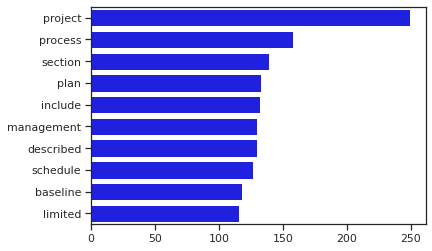

In [ ]:
#Plot common words
#Obtain top 10 words
top_10 = fdist.most_common(10)
#Create pandas series to make plotting easier
fd = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fd.index, x=fd.values, color='blue');

***Chunking***

In [ ]:
#"NP:{<DT>?<JJ>*<NN>}"
sentence = dfFinale['Pos_Tag']
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
print(chunkParser)
for s in dfFinale['Pos_Tag']:
  chunked = chunkParser.parse(s)
  print(chunked)

chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?><VB.?><JJ>*<NN.?>'>
(S projet/NN scope/NN management/NN)
(S projet/NN schedule/NN management/NN)
(S projet/NN cost/NN management/NN)
(S (Chunk plan/NN scope/VBP management/NN))
(S collect/NN requirements/NNS)
(S define/NN scope/NN)
(S create/NN wbs/NN)
(S validate/NN scope/NN)
(S control/NN scope/NN)
(S plan/NN schedule/NN management/NN)
(S define/NN activities/NNS)
(S sequence/NN activities/NNS)
(S estimate/NN activity/NN durations/NNS)
(S develop/VB schedule/NN)
(S control/NN schedule/NN)
(S plan/NN cost/NN management/NN)
(S estimate/NN costs/NNS)
(S determine/NN budget/NN)
(S control/NN costs/NNS)
(S 5/CD 1/CD 1/CD (Chunk plan/NN scope/VBP management/NN) inputs/NNS)
(S 5/CD 2/CD 1/CD collect/NN requirements/NNS inputs/NNS)
(S 1515/CD 3/CD 1/CD define/NN scope/NN inputs/NNS)
(S 5/CD 4/CD 1/CD create/NN wbs/NN inputs/NNS)
(S 5/CD 5/CD 1/CD validate/NN scope/NN inputs/NNS)
(S 5/CD 6/CD 1/CD cont

In [ ]:
dfFinale.Pos_Tag

0          [(projet, NN), (scope, NN), (management, NN)]
1       [(projet, NN), (schedule, NN), (management, NN)]
2           [(projet, NN), (cost, NN), (management, NN)]
3           [(plan, NN), (scope, VBP), (management, NN)]
4                   [(collect, NN), (requirements, NNS)]
                             ...                        
198    [(7, CD), (4, CD), (3, CD), (1, CD), (work, NN...
199    [(7, CD), (4, CD), (3, CD), (2, CD), (cost, NN...
200    [(7, CD), (4, CD), (3, CD), (3, CD), (change, ...
201    [(7, CD), (4, CD), (3, CD), (4, CD), (project,...
202    [(7, CD), (4, CD), (3, CD), (5, CD), (project,...
Name: Pos_Tag, Length: 203, dtype: object

***TF-IDF***

In [ ]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
dfFinale['Pos_Tag']=dfFinale['Pos_Tag'].astype(str)
dfFinale['Pos_Tag']=dfFinale['Pos_Tag'].apply(lambda x : lowercase(x))
word_count_vector=cv.fit_transform(dfFinale['Pos_Tag'])
print(word_count_vector)

  (0, 91)	1
  (0, 81)	3
  (0, 98)	1
  (0, 75)	1
  (1, 91)	1
  (1, 81)	3
  (1, 75)	1
  (1, 97)	1
  (2, 91)	1
  (2, 81)	3
  (2, 75)	1
  (2, 35)	1
  (3, 81)	2
  (3, 98)	1
  (3, 75)	1
  (3, 88)	1
  (3, 115)	1
  (4, 81)	1
  (4, 31)	1
  (4, 94)	1
  (4, 82)	1
  (5, 81)	2
  (5, 98)	1
  (5, 42)	1
  (6, 81)	2
  :	:
  (198, 87)	1
  (198, 65)	1
  (199, 81)	1
  (199, 35)	1
  (199, 82)	1
  (199, 28)	4
  (199, 60)	1
  (200, 81)	1
  (200, 82)	1
  (200, 28)	4
  (200, 29)	1
  (200, 93)	1
  (201, 81)	3
  (201, 75)	1
  (201, 88)	1
  (201, 28)	4
  (201, 90)	1
  (201, 116)	1
  (201, 110)	1
  (202, 81)	1
  (202, 82)	2
  (202, 28)	4
  (202, 90)	1
  (202, 51)	1
  (202, 110)	1


In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
nn,1.034916
cd,1.097764
nns,1.505936
project,2.511458
management,2.707202
...,...
2256,5.624973
1996,5.624973
1976,5.624973
1936,5.624973


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfFinale['Pos_Tag'])
print(vectorizer.get_feature_names())

['1415', '1515', '1535', '1575', '1655', '1796', '1836', '1936', '1976', '1996', '2256', '2497', '2517', '2537', 'accepted', 'activities', 'activity', 'aggregation', 'alternatives', 'analogous', 'analysis', 'attributes', 'baseline', 'basis', 'bottomup', 'budget', 'business', 'calendars', 'cd', 'change', 'charter', 'collect', 'components', 'compression', 'control', 'cost', 'costs', 'create', 'critical', 'current', 'data', 'decision', 'define', 'deliverables', 'dependency', 'determination', 'determine', 'develop', 'diagramming', 'diagrams', 'documentation', 'documents', 'duration', 'durations', 'enterprise', 'estimate', 'estimates', 'estimating', 'expert', 'factors', 'forecasts', 'funding', 'gap', 'gathering', 'historical', 'information', 'inputs', 'integration', 'interpersonal', 'jj', 'judgment', 'lags', 'leads', 'list', 'making', 'management', 'matrix', 'method', 'milestone', 'needs', 'network', 'nn', 'nns', 'optimization', 'outputs', 'parametric', 'path', 'performance', 'plan', 'prece

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


***Similarty Distance***

In [ ]:
def LevenshteinDistance():
  edDictio={}
  for word in dfFinale['Pos_Tag']:
    a=np.random.choice(dfFinale['Pos_Tag'])
    b=np.random.choice(dfFinale['Pos_Tag'])
    ed_sent=nltk.edit_distance(a,b)
    edDictio[a,b]=ed_sent
  print(edDictio)

In [ ]:
LevenshteinDistance()

{("[('6', 'cd'), ('4', 'cd'), ('3', 'cd'), ('1', 'cd'), ('duration', 'nn'), ('estimates', 'nns')]", "[('7', 'cd'), ('1', 'cd'), ('1', 'cd'), ('1', 'cd'), ('project', 'nn'), ('charter', 'nn')]"): 18, ("[('7', 'cd'), ('4', 'cd'), ('1', 'cd'), ('control', 'nn'), ('costs', 'nns'), ('inputs', 'vbp')]", "[('5', 'cd'), ('4', 'cd'), ('3', 'cd'), ('create', 'nn'), ('wbs', 'nn'), ('outputs', 'nns')]"): 19, ("[('6', 'cd'), ('6', 'cd'), ('3', 'cd'), ('3', 'cd'), ('change', 'nn'), ('requests', 'nns')]", "[('6', 'cd'), ('3', 'cd'), ('1', 'cd'), ('sequence', 'nn'), ('activities', 'nns'), ('inputs', 'vbp')]"): 29, ("[('6', 'cd'), ('3', 'cd'), ('1', 'cd'), ('2', 'cd'), ('project', 'nn'), ('documents', 'nns')]", "[('5', 'cd'), ('2', 'cd'), ('2', 'cd'), ('4', 'cd'), ('decision', 'nn'), ('making', 'nn')]"): 21, ("[('1655', 'cd'), ('5', 'cd'), ('2', 'cd'), ('validate', 'nn'), ('scope', 'nn'), ('tools', 'nns'), ('techniques', 'nns')]", "[('6', 'cd'), ('3', 'cd'), ('3', 'cd'), ('1', 'cd'), ('project', 'nn'),

***Word-cloud***

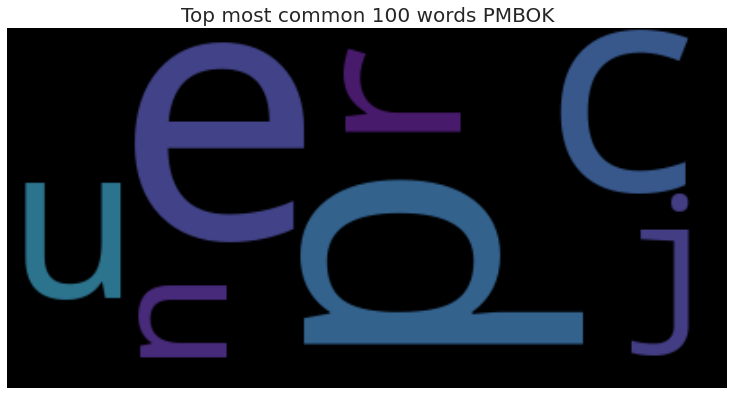

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk


# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(stop_words),background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words PMBOK",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('PMBOK_cost_time_scop_top_100.jpeg')